In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearnex import patch_sklearn
import os
from tqdm import tqdm
import time

In [60]:
base_path = "../datasets/phase1/train/"
base_path_test = "../datasets/phase1/test/"

X_train = pd.read_csv(os.path.join(base_path, 'X1_train.csv'))
y_train = pd.read_csv(os.path.join(base_path, 'y1_train.csv'))
X2_train = pd.read_csv(os.path.join(base_path, 'X2_train.csv'))
Y2_train = pd.read_csv(os.path.join(base_path, 'y2_train.csv'))
X3_train = pd.read_csv(os.path.join(base_path, 'X3_train.csv'))
Y3_train = pd.read_csv(os.path.join(base_path, 'y3_train.csv'))
X4_train = pd.read_csv(os.path.join(base_path, 'X4_train.csv'))
Y4_train = pd.read_csv(os.path.join(base_path, 'y4_train.csv'))

X1_test = pd.read_csv(os.path.join(base_path_test, 'X1_test.csv'))
Y1_test = pd.read_csv(os.path.join(base_path_test, 'y1_test.csv'))
X2_test = pd.read_csv(os.path.join(base_path_test, 'X2_test.csv'))
Y2_test = pd.read_csv(os.path.join(base_path_test, 'y2_test.csv'))
X3_test = pd.read_csv(os.path.join(base_path_test, 'X3_test.csv'))
Y3_test = pd.read_csv(os.path.join(base_path_test, 'y3_test.csv'))
X4_test = pd.read_csv(os.path.join(base_path_test, 'X4_test.csv'))
Y4_test = pd.read_csv(os.path.join(base_path_test, 'y4_test.csv'))

X_train_list = [X_train, X2_train, X3_train, X4_train]
Y_train_list = [y_train, Y2_train, Y3_train, Y4_train]
X_test_list = [X1_test, X2_test, X3_test, X4_test]
Y_test_list = [Y1_test, Y2_test, Y3_test, Y4_test]

X, y = X_train, y_train

In [24]:
patch_sklearn()

def plot_validation_curve(model, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label='Training MSE')
    plt.plot(param_range, val_mean, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_learning_curve(model, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training MSE')
    plt.plot(train_sizes, val_mean, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    
    bias = train_mean[-1]
    variance = val_mean[-1] - train_mean[-1]
    plt.annotate(f'Bias: {bias:.2f}', xy=(train_sizes[-1], bias), 
                xytext=(10, 10), textcoords='offset points')
    plt.annotate(f'Variance: {variance:.2f}', xy=(train_sizes[-1], val_mean[-1]), 
                xytext=(10, -10), textcoords='offset points')
    
    plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [25]:
model_name = "Decision Tree"
model = DecisionTreeRegressor()
param_name = "max_depth"
param_range = range(10, 20)

plot_validation_curve(model, param_name, param_range, model_name)

KeyboardInterrupt: 

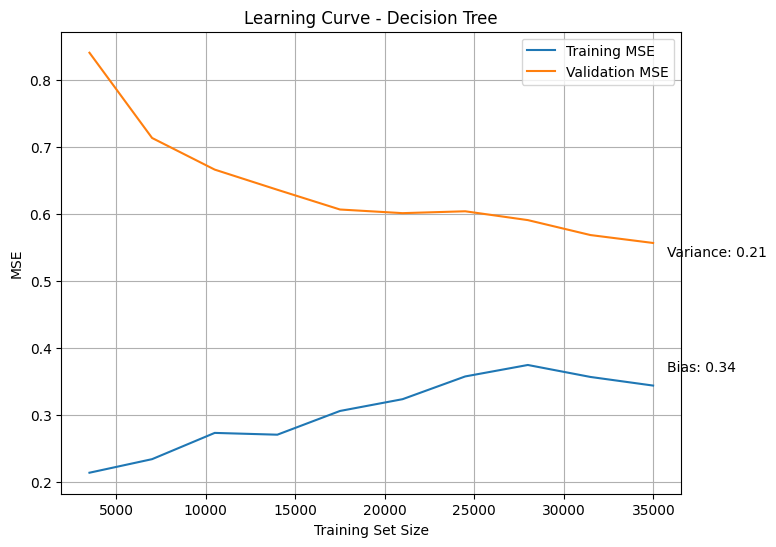

In [26]:
final_model = DecisionTreeRegressor(max_depth=14)
plot_learning_curve(final_model, model_name)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


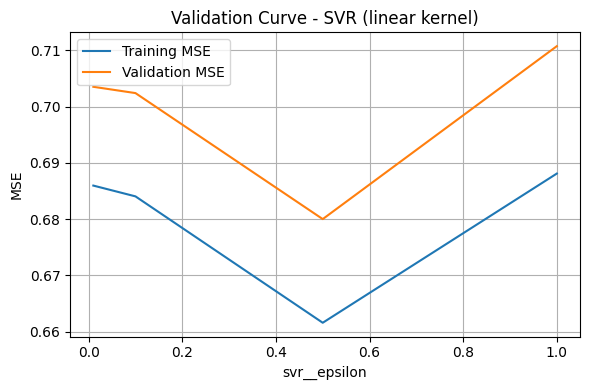

Best svr__epsilon: 0.5 with Validation MSE: 0.68


KeyboardInterrupt: 

In [14]:
model_name = "SVR (linear kernel)"
model = make_pipeline(StandardScaler(), SVR(kernel='linear'))
param_name = "svr__epsilon"
param_range = [0.1, 0.5, 0,7, 1.0]

plot_validation_curve(model, param_name, param_range, model_name)

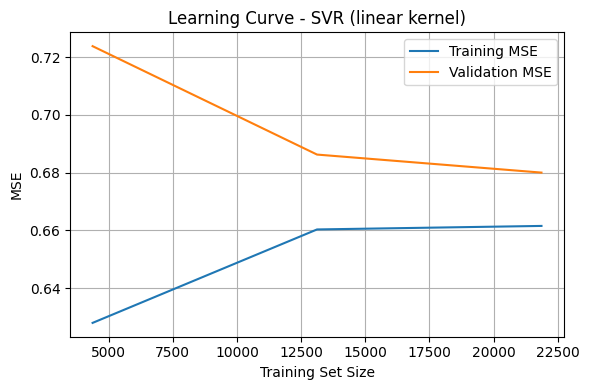

Bias Estimate (Final Training MSE): 0.66
Variance Estimate (Gap): 0.02


In [15]:
final_model = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.5, kernel='linear'))
plot_learning_curve(final_model, model_name)

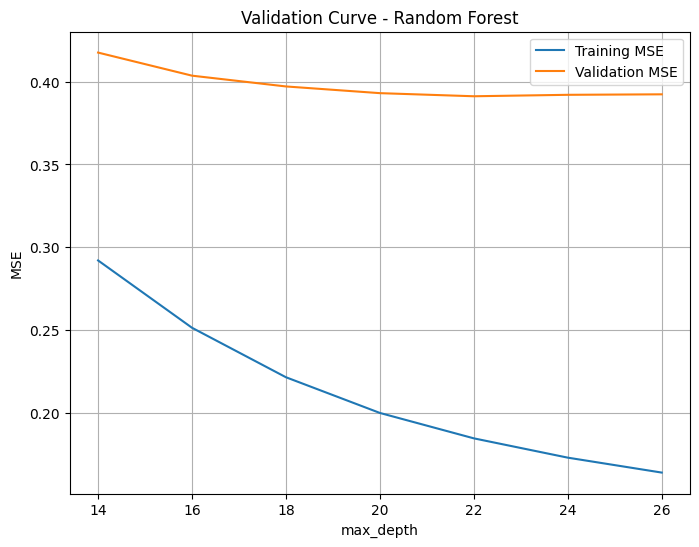

In [31]:
model_name = "Random Forest"
model = RandomForestRegressor(n_estimators=10, warm_start=True, random_state=42)
param_name = "max_depth"
param_range = [4, 14, 16, 18, 20, 22, 24, 26]

plot_validation_curve(model, param_name, param_range, model_name)

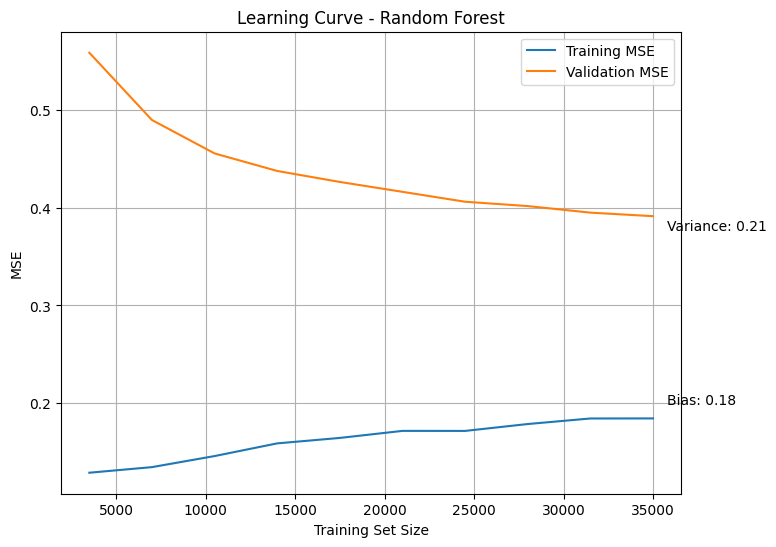

In [32]:
best_model = RandomForestRegressor(n_estimators=10, max_depth=22, warm_start=True, random_state=42)
plot_learning_curve(best_model, model_name)

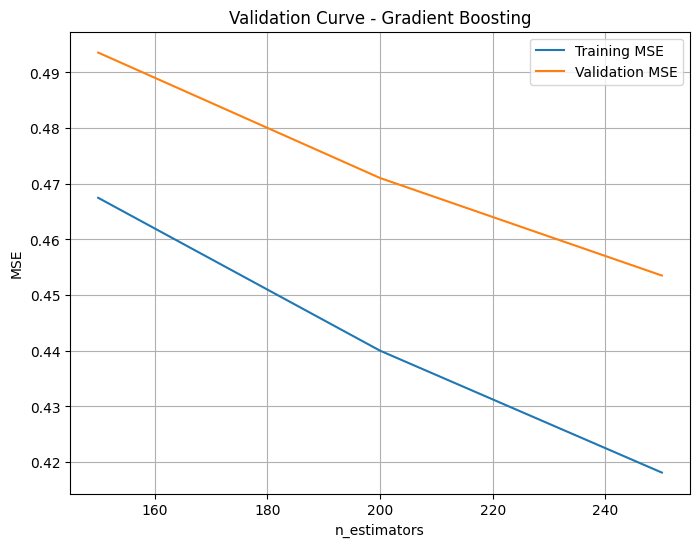

In [35]:
model_name = "Gradient Boosting"
model = GradientBoostingRegressor(random_state=42)
param_name = "n_estimators"
param_range = [150, 200, 250] 

plot_validation_curve(model, param_name, param_range, model_name)

In [ ]:
final_model = GradientBoostingRegressor(n_estimators=250, random_state=42)
plot_learning_curve(final_model, model_name)

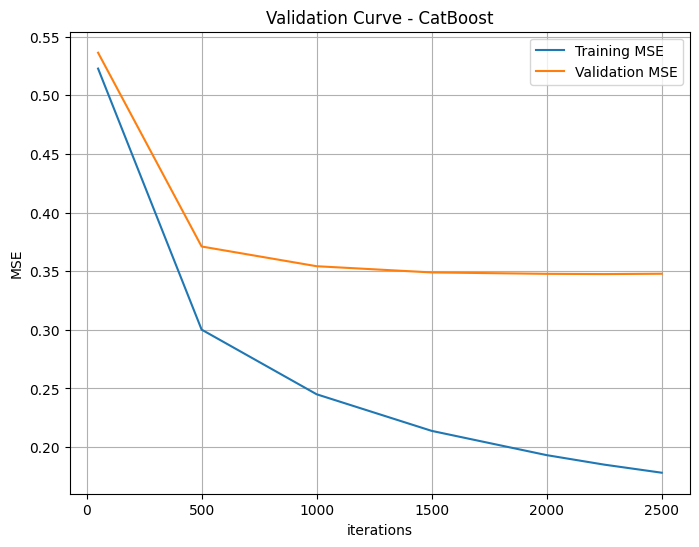

In [57]:
model_name = "CatBoost"
model = CatBoostRegressor(
    random_state=42,
    verbose=False, 
    task_type='CPU',  
    max_bin=32,  
    depth=6,  
    iterations=100, 
    learning_rate=0.1,
    subsample=0.8,  
    colsample_bylevel=0.8,
    devices='0:1'  
)
param_name = "iterations"
param_range = [50, 500, 1000, 1500, 2000, 2250, 2500] 

plot_validation_curve(model, param_name, param_range, model_name)

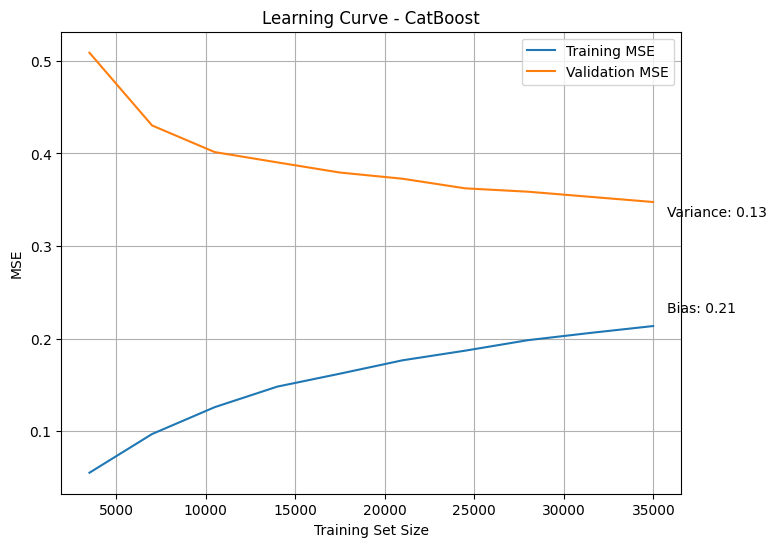

In [58]:
final_model = CatBoostRegressor(
    random_state=42,
    verbose=False, 
    task_type='CPU',  
    max_bin=32,  
    depth=6,  
    iterations=1500, 
    learning_rate=0.1,
    subsample=0.8,  
    colsample_bylevel=0.8,
    devices='0:1'  
)
plot_learning_curve(final_model, model_name)

In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=14),
    'SVR': make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.5, kernel='linear')),
    'Random Forest': RandomForestRegressor(n_estimators=10, max_depth=22, warm_start=True, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

results = []

for name, model in tqdm(models.items(), desc="Evaluating models"):
    mse_list = []
    train_time_list = []
    predict_time_list = []

    for i in range(4):
        X_train = X_train_list[i]
        y_train = Y_train_list[i]
        X_test = X_test_list[i]
        y_test = Y_test_list[i]

        # Training
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # Prediction
        start_time = time.time()
        y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time

        # Evaluation
        mse = mean_squared_error(y_test, y_pred)

        # Store
        mse_list.append(mse)
        train_time_list.append(training_time)
        predict_time_list.append(prediction_time)

    results.append([
        name,
        round(np.mean(mse_list), 4),
        round(np.mean(train_time_list), 4),
        round(np.mean(predict_time_list), 4)
    ])

# Create table
df_results = pd.DataFrame(results, columns=[
    'Model',
    'Average MSE (Evaluation Metric)',
    'Average Training Time (s)',
    'Average Prediction Time (s)'
])

print(df_results)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import os
import time
from sklearnex import patch_sklearn
patch_sklearn()
base_path_train = "phase1/train/"
base_path_test = "phase1/test/"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path_train, f'X{i}_train.csv')).values for i in range(1, 5)
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path_train, f'y{i}_train.csv')).values.ravel() for i in range(1, 5)
], axis=0)

X_test = np.concatenate([
    pd.read_csv(os.path.join(base_path_test, f'X{i}_test.csv')).values for i in range(1, 5)
], axis=0)

y_test = np.concatenate([
    pd.read_csv(os.path.join(base_path_test, f'y{i}_test.csv')).values.ravel() for i in range(1, 5)
], axis=0)

param_range = range(1, 6)
cv = 3
learning_curve_train_sizes = np.linspace(0.1, 1.0, 5)

val_models = len(param_range) * cv
learn_models = len(learning_curve_train_sizes) * cv
estimated_time_per_model = 1.0

print("\n=== Estimated Runtime ===")
print(f"Estimated Validation Curve Time: {val_models * estimated_time_per_model:.1f} seconds")
print(f"Estimated Learning Curve Time: {learn_models * estimated_time_per_model:.1f} seconds")
print(f"Total Estimated Time: {(val_models + learn_models) * estimated_time_per_model:.1f} seconds")
print("=========================\n")

def plot_validation_curve_tqdm(model, param_name, param_range, model_name):
    train_scores, val_scores = [], []

    print("Computing Validation Curve...")
    for degree in tqdm(param_range, desc="Validation Curve Degrees"):
        model.set_params(**{param_name: degree})
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        train_fold_scores, val_fold_scores = [], []

        for train_index, val_index in kf.split(X):
            X_tr, X_val = X[train_index], X[val_index]
            y_tr, y_val = y[train_index], y[val_index]

            model_clone = clone(model)
            model_clone.fit(X_tr, y_tr)
            y_tr_pred = model_clone.predict(X_tr)
            y_val_pred = model_clone.predict(X_val)

            train_fold_scores.append(mean_squared_error(y_tr, y_tr_pred))
            val_fold_scores.append(mean_squared_error(y_val, y_val_pred))

        train_scores.append(np.mean(train_fold_scores))
        val_scores.append(np.mean(val_fold_scores))

    plt.figure(figsize=(6, 4))
    plt.plot(param_range, train_scores, label='Training MSE')
    plt.plot(param_range, val_scores, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_index = np.argmin(val_scores)
    print(f"Best {param_name}: {param_range[best_index]} with Validation MSE: {val_scores[best_index]:.2f}")

def plot_learning_curve_tqdm(model, model_name):
    train_scores, val_scores = [], []
    print("Computing Learning Curve...")

    for frac in tqdm(learning_curve_train_sizes, desc="Learning Curve Sizes"):
        size = int(frac * len(X))
        X_subset, y_subset = X[:size], y[:size]
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        train_fold_scores, val_fold_scores = [], []

        for train_index, val_index in kf.split(X_subset):
            X_tr, X_val = X_subset[train_index], X_subset[val_index]
            y_tr, y_val = y_subset[train_index], y_subset[val_index]

            model_clone = clone(model)
            model_clone.fit(X_tr, y_tr)
            y_tr_pred = model_clone.predict(X_tr)
            y_val_pred = model_clone.predict(X_val)

            train_fold_scores.append(mean_squared_error(y_tr, y_tr_pred))
            val_fold_scores.append(mean_squared_error(y_val, y_val_pred))

        train_scores.append(np.mean(train_fold_scores))
        val_scores.append(np.mean(val_fold_scores))

    plt.figure(figsize=(6, 4))
    plt.plot(learning_curve_train_sizes * len(X), train_scores, label='Training MSE')
    plt.plot(learning_curve_train_sizes * len(X), val_scores, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Bias Estimate (Final Training MSE): {train_scores[-1]:.2f}")
    print(f"Variance Estimate (Gap): {val_scores[-1] - train_scores[-1]:.2f}")

model_name = "Polynomial Regression"
base_model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_name = "polynomialfeatures__degree"

start_time = time.time()
plot_validation_curve_tqdm(base_model, param_name, param_range, model_name)
print(f"\nActual Validation Curve Time: {time.time() - start_time:.2f} seconds")

final_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

start_time = time.time()
plot_learning_curve_tqdm(final_model, model_name)
print(f"\nActual Learning Curve Time: {time.time() - start_time:.2f} seconds")

print("\nEvaluating on test data...")
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)



=== Estimated Runtime ===
Estimated Validation Curve Time: 15.0 seconds
Estimated Learning Curve Time: 15.0 seconds
Total Estimated Time: 30.0 seconds

Computing Validation Curve...


Validation Curve Degrees:   0%|          | 0/5 [00:00<?, ?it/s]h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ens

MemoryError: bad allocation